1.- Importacion de datos y standarizacion de nombre de columnas

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv("./data/wine-data.csv")
dataset = dataset.astype(float).fillna(0.0)
dataset.head()
# Crear un DataFrame con los datos y los nombres de las características
#dataset = pd.DataFrame(data=housing.data, columns=housing.feature_names)
#dataset['MedianaPrecioVivienda'] = housing.target
# Imprimir las primeras 10 filas del DataFrame

#print(dataset.shape)
#print(housing.DESCR)
#print(dataset)




,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.9,0.30,0.68,8.3,0.050,37.5,289.0,0.99316,3.01,0.51,12.3,7.0
1,7.9,0.30,0.68,8.3,0.050,37.5,278.0,0.99316,3.01,0.51,12.3,7.0
2,6.1,0.21,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6.0
3,5.9,0.29,0.25,13.4,0.067,72.0,160.0,0.99721,3.33,0.54,10.3,6.0
4,9.8,0.88,0.25,2.5,0.104,35.0,155.0,1.00100,3.41,0.67,11.2,5.0


Analisis de la columna Profit, con respecto a la frecuencia de datos

<Axes: >

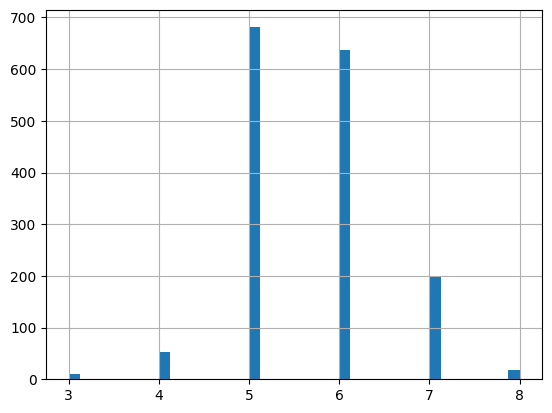

In [2]:
dataset.quality.hist(bins=40)

Analizando las correlaciones de manera gráfica

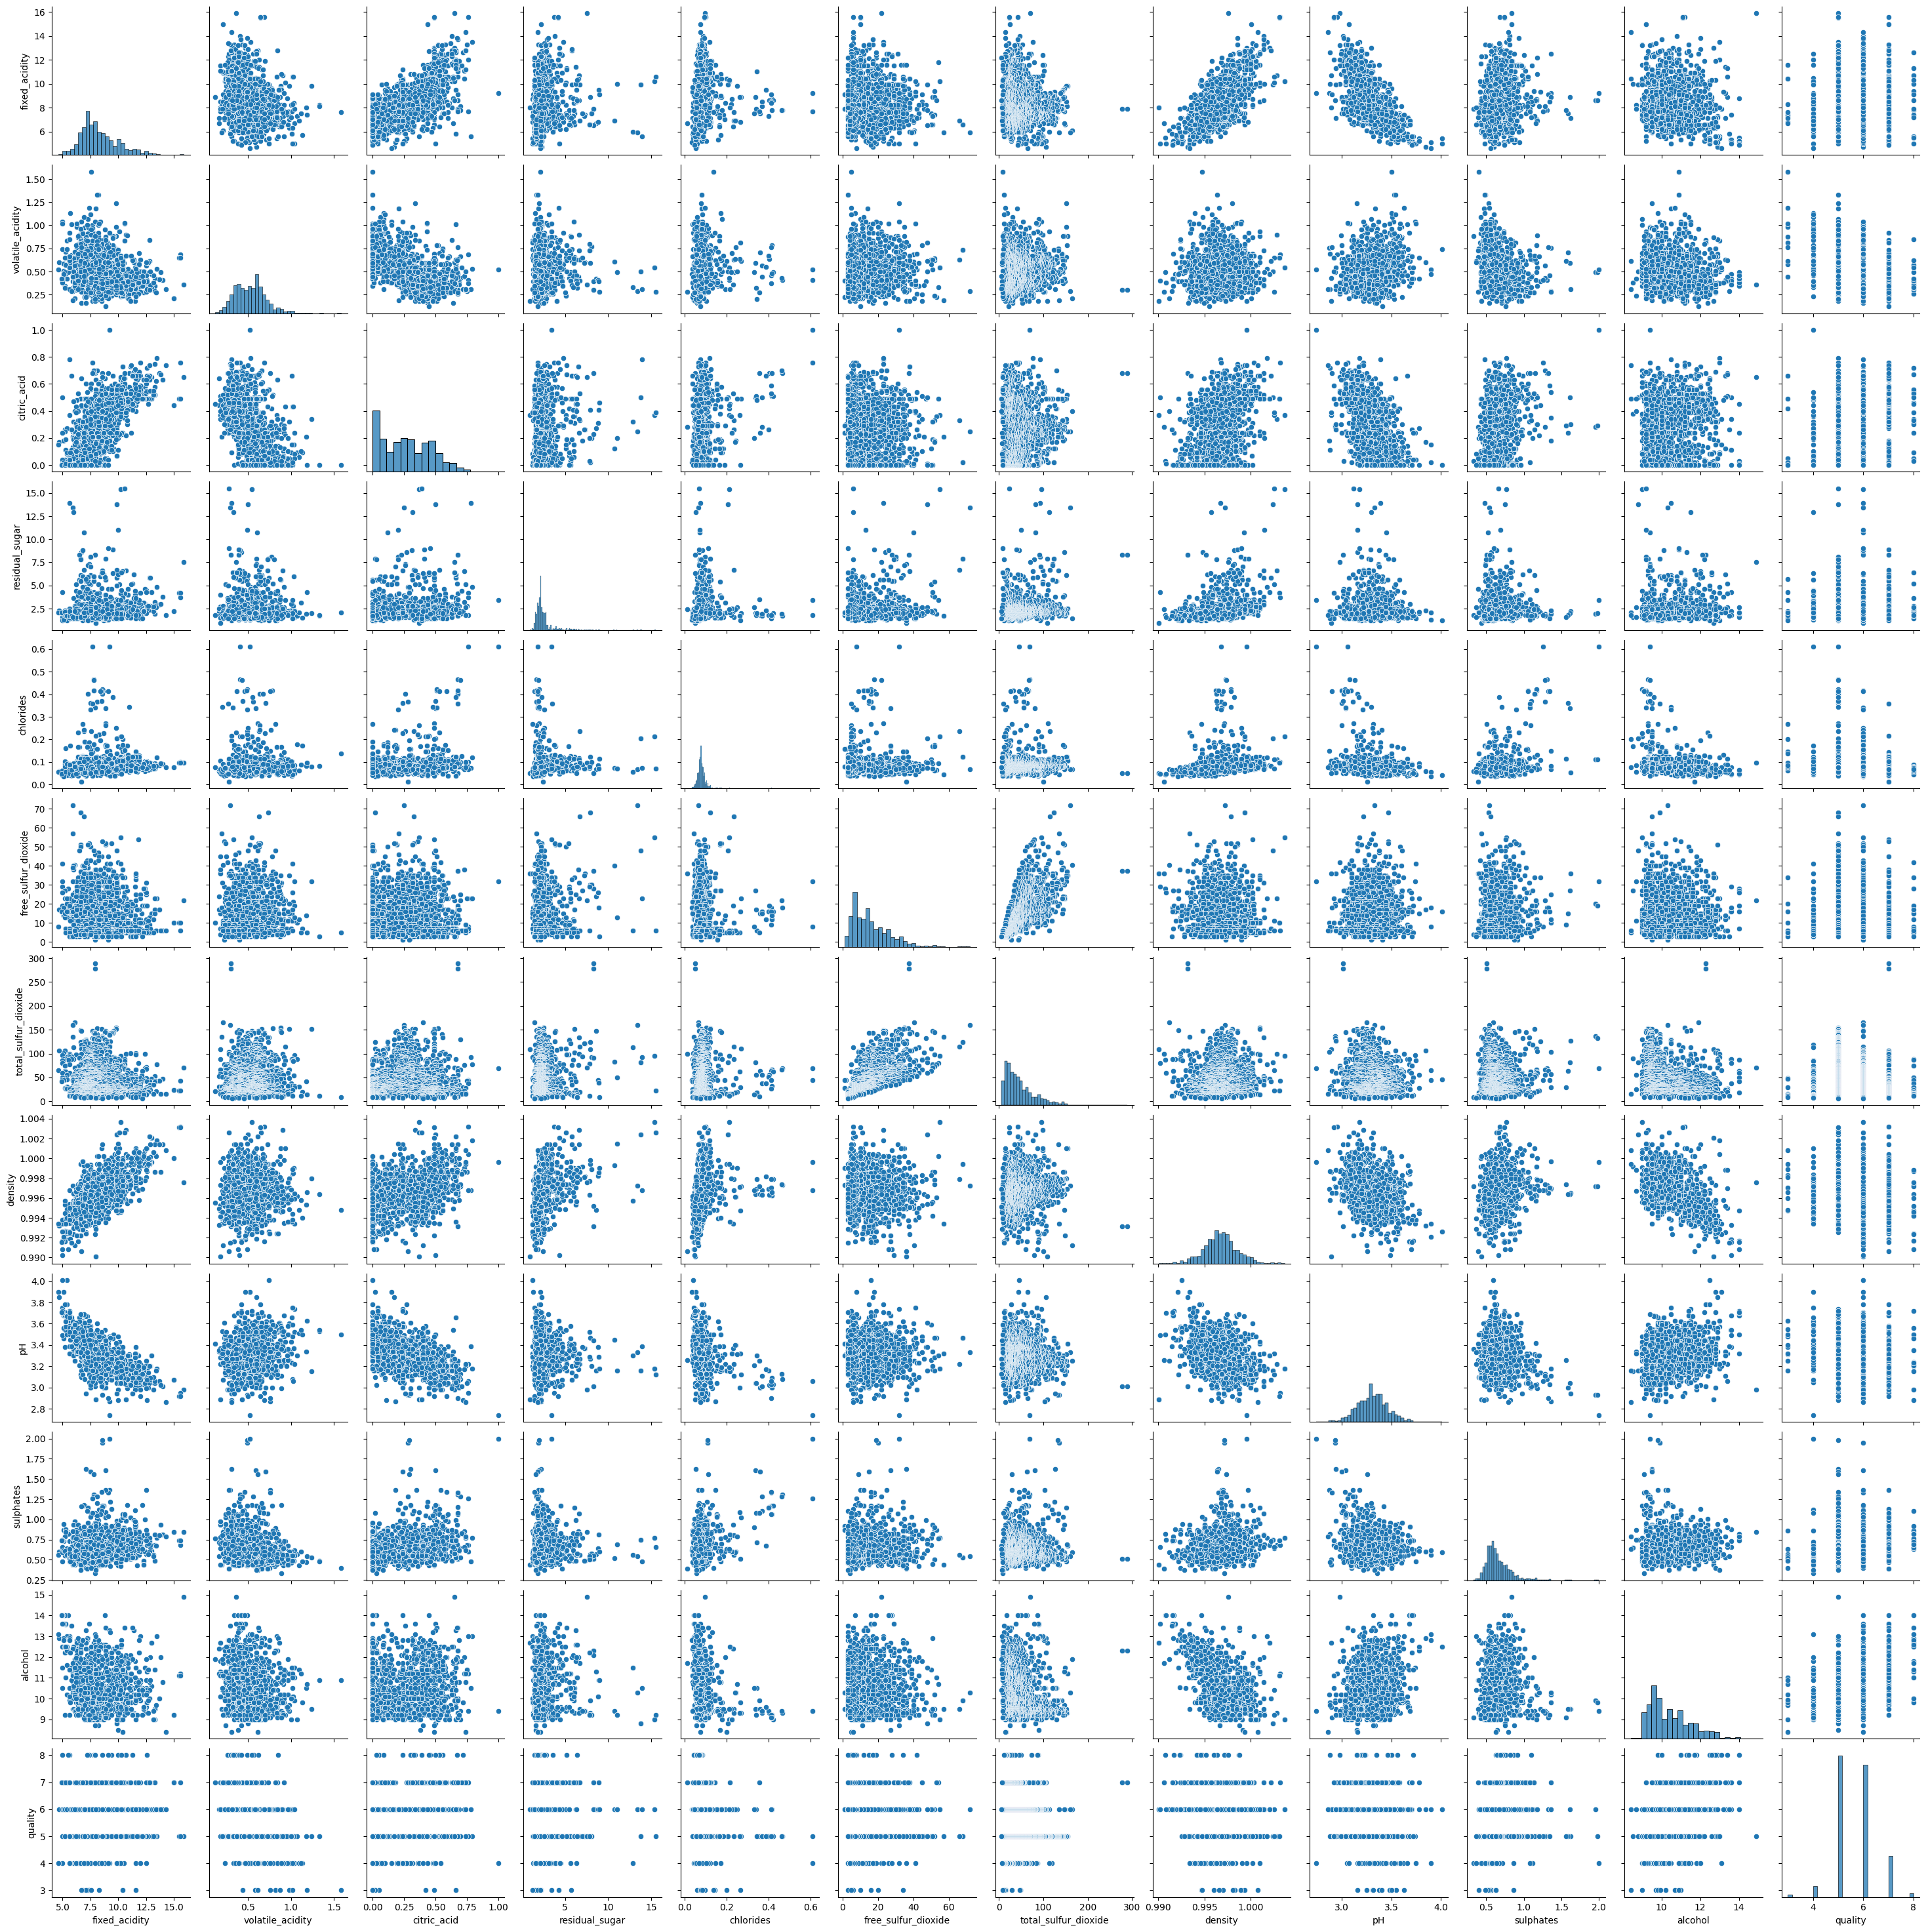

In [3]:
import matplotlib.pyplot  as plt
import seaborn as sns
sns.pairplot(dataset, height=2.5)
plt.show()

Analizando las correlaciones mediante un mapa de calor

<Axes: >

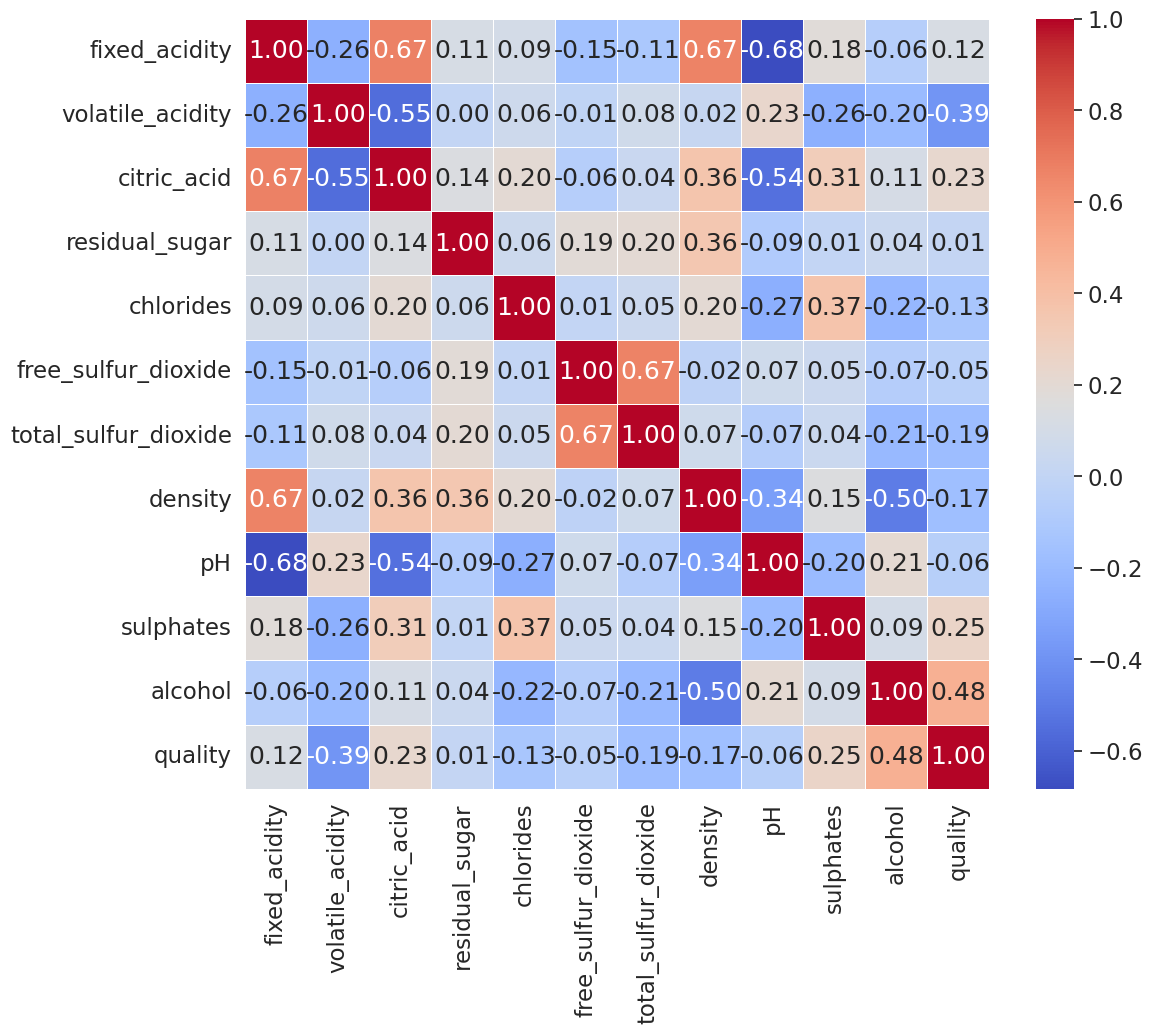

In [37]:
import numpy as np
import matplotlib.pyplot as plt
#fixed_acidity	volatile_acidity	citric_acid	residual_sugar	chlorides	free_sulfur_dioxide	total_sulfur_dioxide	density	pH	sulphates	alcohol	quality
#MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude
numeric_cols = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates', 'alcohol','quality' ]
cm = np.corrcoef(dataset[numeric_cols].values.T)
sns.set_theme(font_scale=1.5, rc={"figure.figsize": (12, 10)})
sns.heatmap(cm, annot=True, fmt=".2f", cmap="coolwarm",yticklabels=numeric_cols, xticklabels=numeric_cols,linewidths=0.5)



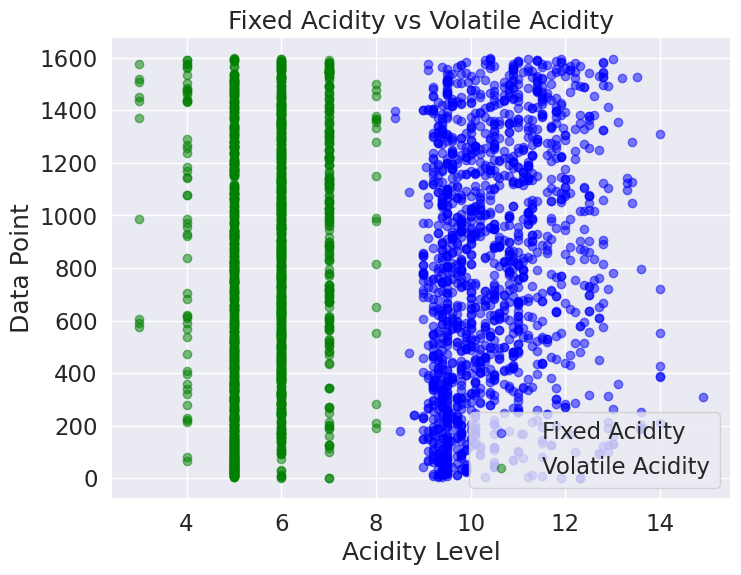

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

#'alcohol','quality'
# Extraer las características
x_graf = dataset["alcohol"]
y_graf = dataset["quality"]

# Graficar
# Graficar
plt.figure(figsize=(8, 6))

# Gráfico para fixed_acidity (en azul)
plt.scatter(x_graf, range(len(x_graf)), color='blue', alpha=0.5, label='Fixed Acidity')

# Gráfico para volatile_acidity (en verde)
plt.scatter(y_graf, range(len(y_graf)), color='green', alpha=0.5, label='Volatile Acidity')

# Configuración de leyendas y etiquetas
plt.title('Fixed Acidity vs Volatile Acidity')
plt.xlabel('Acidity Level')
plt.ylabel('Data Point')
plt.legend()

plt.grid(True)
plt.show()


In [5]:
X_cols = list(set(dataset.columns)-set(['quality']))
y_cols = ['quality']

x = dataset[X_cols].values
y = dataset[y_cols].values


3. Division de datos de entrenamiento y test usando standard sklearn

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

y_normalizado = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(x, y_normalizado, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo SVM
svm_model = SVC(kernel='linear')  # Usamos un kernel lineal para empezar
svm_model.fit(X_train_scaled, y_train)
print(svm_model.score(X_test,y_test))

ValueError: Precomputed matrix must be a square matrix. Input is a 1279x11 matrix.

In [49]:
#Evaluacion del modelo con puntaje F1
from sklearn.metrics import f1_score, jaccard_score
y_pred = svm_model.predict(X_test_scaled)
print("Puntaje F1", f1_score(y_test,y_pred,average='weighted'))


print("Puntaje Jaccard", jaccard_score(y_test,y_pred,pos_label=2,average='weighted'))
#Evaluacion del modelo con indice de Jaccard



Puntaje F1 0.6127556954917376
Puntaje Jaccard 0.45135964912280696


/home/eyacelga/.virtualenvs/ai-proyecto-local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1561: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [50]:
from sklearn.metrics import classification_report, confusion_matrix
# Hacer predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test_scaled)

# Evaluar el modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))
print(svm_model.score(X_test, y_test))

Matriz de Confusión:
[[  0   0   1   0   0   0]
 [  0   0   4   2   0   0]
 [  0   0 104  41   1   0]
 [  0   0  41  81   6   0]
 [  0   0   3  18  15   0]
 [  0   0   0   1   2   0]]

Reporte de Clasificación:
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         6
         5.0       0.68      0.71      0.70       146
         6.0       0.57      0.63      0.60       128
         7.0       0.62      0.42      0.50        36
         8.0       0.00      0.00      0.00         3

    accuracy                           0.62       320
   macro avg       0.31      0.29      0.30       320
weighted avg       0.61      0.62      0.61       320

0.45625


/home/eyacelga/.virtualenvs/ai-proyecto-local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/eyacelga/.virtualenvs/ai-proyecto-local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/eyacelga/.virtualenvs/ai-proyecto-local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

El reporte de clasificación que has proporcionado muestra las métricas de precisión, recall y F1-score para cada clase en tu conjunto de datos. Aquí tienes una explicación de estas métricas:

Precision (Precisión): La precisión se calcula como el número de verdaderos positivos dividido por el número total de predicciones positivas realizadas por el clasificador. En otras palabras, indica la proporción de predicciones positivas que fueron correctas. Una alta precisión indica que el clasificador hizo pocas predicciones positivas incorrectas.
Recall (Recuperación o Sensibilidad): El recall se calcula como el número de verdaderos positivos dividido por el número total de instancias que realmente son positivas. Indica la proporción de casos positivos reales que el clasificador identificó correctamente. Un alto recall indica que el clasificador identifica correctamente la mayoría de los casos positivos reales.
F1-score: El F1-score es la media armónica de precisión y recall. Proporciona una medida de la precisión general del modelo. El F1-score es útil cuando hay un desbalance entre las clases, ya que tiene en cuenta tanto los falsos positivos como los falsos negativos.
Support: El soporte es simplemente el número de ocurrencias de cada clase en el conjunto de datos de prueba. Proporciona información sobre el número de muestras en cada clase.
Veamos cómo interpretar estos resultados en tu reporte de clasificación:

Para la clase "3.0", la precisión, recall y F1-score son todas 0.00, lo que indica que el modelo no fue capaz de predecir correctamente ninguna instancia de esta clase. Esto podría ser debido a un bajo número de muestras de esta clase en el conjunto de datos.
Para las clases "4.0", "7.0" y "8.0", la precisión, recall y F1-score también son todas 0.00, lo que indica un rendimiento muy pobre del modelo en estas clases.
Para las clases "5.0" y "6.0", la precisión y recall son relativamente altas, pero no muy equilibradas. El F1-score también es moderado, lo que sugiere un rendimiento decente pero no excelente en estas clases.
En general, este reporte de clasificación sugiere que el modelo tiene un rendimiento mediocre. La precisión, recall y F1-score son bastante bajos para la mayoría de las clases, lo que indica que el modelo no está haciendo predicciones muy precisas o sensibles. Es posible que necesites ajustar el modelo, probar diferentes algoritmos o considerar la ingeniería de características para mejorar su rendimiento.


Accuracy (Exactitud): La exactitud es la proporción de predicciones correctas en el conjunto de datos de prueba. Es una métrica general que indica qué tan bien el modelo clasifica todas las clases en general.
Macro Average (Promedio Macro): Esta métrica calcula la media de las métricas (precisión, recall, F1-score) para cada clase sin considerar su frecuencia en los datos. Es útil cuando el conjunto de datos tiene clases desbalanceadas.
Weighted Average (Promedio Ponderado): Similar al promedio macro, pero pondera las métricas según el número de muestras en cada clase. Esto da más peso a las clases con más muestras y es útil en casos de desbalance de clases.
Ahora veamos cómo interpretar estos resultados en tu conjunto de datos:

Accuracy: La exactitud es del 0.58, lo que significa que el 58% de las predicciones del modelo son correctas. Esto sugiere un rendimiento mediocre del modelo en general.
Macro Average: La precisión, recall y F1-score promedio para todas las clases son muy bajas (alrededor de 0.28), lo que indica un rendimiento pobre del modelo en general.
Weighted Average: La precisión, recall y F1-score promedio ponderadas por el soporte (número de muestras) son ligeramente mejores (alrededor de 0.56), lo que indica un rendimiento un poco mejor cuando se considera el desbalance de clases.
En resumen, este resultado sugiere que el modelo no está funcionando bien en general. La exactitud es baja y las métricas promedio también son bajas. Es posible que necesites ajustar el modelo, considerar la selección de características, probar diferentes algoritmos o recopilar más datos para mejorar su rendimiento.

5. Creacion del modelo como PKL

In [ ]:
from joblib import dump
dump(svm_model, './model/model-polinomic.pkl')

['./model/model-polinomic.pkl']